In [1]:
import librosa
import numpy as np
import os
import pandas as pd
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("Metadata (1).csv",usecols=["Dataset File Name","Class ID","Class Name"]) 

In [5]:
X = df['Dataset File Name']
Y = df['Class Name']
labels = df['Class Name'].unique()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

#### Extracting MFCCS

In [10]:
def extract__mfccs_features(audio_path, output_path):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=None)
    
    # Extract MFCC
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    
    # Plot MFCCs
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.axis('off')  # Turn off the axis
    plt.tight_layout(pad=0)

    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()

In [146]:
mfccs_train_dir = 'new_features/mfccs/train/'
mfccs_test_dir = 'new_features/mfccs/test/'
os.makedirs(mfccs_train_dir, exist_ok=True)
os.makedirs(mfccs_test_dir, exist_ok=True)

In [148]:
for label in labels:  # 27 labels
    label_mfccs_training_dir = os.path.join(mfccs_train_dir, label)
    label_mfccs_testing_dir = os.path.join(mfccs_test_dir, label)
    os.makedirs(label_mfccs_training_dir, exist_ok=True)
    os.makedirs(label_mfccs_testing_dir, exist_ok=True)

In [150]:
# Generating mfccs and saving to the appropriate directories
for wav_file, y in zip(X_train, y_train):
    if wav_file.endswith('.wav'):
        mfccs_training_path = mfccs_train_dir + y + "/" + wav_file[:-4] + ".png"
        extract__mfccs_features(r"C:\Users\kanis\Downloads\Audio Files/"+ wav_file, mfccs_training_path)

for wav_file, y in zip(X_test, y_test):
    if wav_file.endswith('.wav'):
        mfcccs_testing_path = mfccs_test_dir + y + "/" + wav_file[:-4] + ".png"
        extract__mfccs_features(r"C:\Users\kanis\Downloads\Audio Files/"+ wav_file, mfcccs_testing_path)

C:\Users\kanis\anaconda3\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


#### Extracting Chromas

In [12]:
def extract_chroma_features(audio_path, output_path):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=None)
    
    # Extract Chroma features
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    
    # Plot Chroma
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chroma, x_axis='time')
    plt.axis('off')  # Turn off the axis
    plt.tight_layout(pad=0)

    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()

In [14]:
chroma_train_dir = 'new_features/chroma/train/'
chroma_test_dir = 'new_features/chroma/test/'
os.makedirs(chroma_train_dir, exist_ok=True)
os.makedirs(chroma_test_dir, exist_ok=True)

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

for label in labels:  # 27 labels
    label_chroma_training_dir = os.path.join(chroma_train_dir, label)
    label_chroma_testing_dir = os.path.join(chroma_test_dir, label)
    os.makedirs(label_chroma_training_dir, exist_ok=True)
    os.makedirs(label_chroma_testing_dir, exist_ok=True)

In [158]:
# Generating chromas and saving to the appropriate directories
for wav_file, y in zip(X_train, y_train):
    if wav_file.endswith('.wav'):
        chroma_training_path = chroma_train_dir + y + "/" + wav_file[:-4] + ".png"
        extract_chroma_features(r"C:\Users\kanis\Downloads\Audio Files/"+wav_file, chroma_training_path)

for wav_file, y in zip(X_test, y_test):
    if wav_file.endswith('.wav'):
        chroma_testing_path = chroma_test_dir + y + "/" + wav_file[:-4] + ".png"
        extract_chroma_features(r"C:\Users\kanis\Downloads\Audio Files/"+wav_file, chroma_testing_path)

C:\Users\kanis\anaconda3\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


#### Extracting Log_Mel

In [16]:
def extract_log_mel_features(audio_path, output_path):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=None)
    
    # Extract Log-Mel Spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    log_mel = librosa.power_to_db(mel_spectrogram)
    
    # Plot Log-Mel Spectrogram
    librosa.display.specshow(log_mel, x_axis='time', y_axis='log')
    plt.axis('off')  # Turn off the axis
    plt.tight_layout(pad=0)

    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()


In [18]:
log_mel_train_dir = 'new_features/log_mel/train/'
log_mel_test_dir = 'new_features/log_mel/test/'
os.makedirs(log_mel_train_dir, exist_ok=True)
os.makedirs(log_mel_test_dir, exist_ok=True)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

for label in labels:  # 27 labels
    label_log_mel_training_dir = os.path.join(log_mel_train_dir, label)
    label_log_mel_testing_dir = os.path.join(log_mel_test_dir, label)
    os.makedirs(label_log_mel_training_dir, exist_ok=True)
    os.makedirs(label_log_mel_testing_dir, exist_ok=True)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\kanis\\audio data\\new_features\\log_mel\\test\\SquirrelGenerator\\12_11262.png'

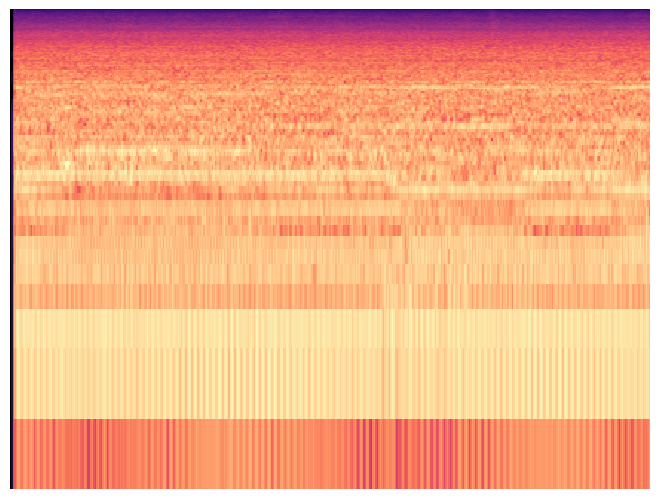

In [22]:
# Generating kog_mel and saving to the appropriate directories
for wav_file, y in zip(X_train, y_train):
    if wav_file.endswith('.wav'):
        log_mel_training_path = log_mel_train_dir + y + "/" + wav_file[:-4] + ".png"
        extract_log_mel_features(r"C:\Users\kanis\Downloads\Audio Files/"+wav_file, log_mel_training_path)

for wav_file, y in zip(X_test, y_test):
    if wav_file.endswith('.wav'):
        log_mel_testing_path = label_log_mel_testing_dir + y + "/" + wav_file[:-4] + ".png"
        extract_log_mel_features(r"C:\Users\kanis\Downloads\Audio Files/"+wav_file, log_mel_testing_path)